In [1]:
import torch
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

/data/scratch/erives/anaconda3/envs/verlet/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def graph_frame(receptor, ligand):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    receptor_edges = torch.tensor([[0, 1], [0, 2], [0, 3]])
    ligand_edges = torch.tensor([[0, 1], [0, 2], [0, 3]])

    for idx, node in enumerate(torch.cat([receptor,ligand])):
        ax.scatter(node[0], node[1], node[2], color='black', label='1')
        ax.text(node[0], node[1], node[2], str(idx % 4))

    for edge in receptor_edges:
        x = [receptor[edge[0]][0], receptor[edge[1]][0]]
        y = [receptor[edge[0]][1], receptor[edge[1]][1]]
        z = [receptor[edge[0]][2], receptor[edge[1]][2]]
        ax.plot(x, y, z, color='blue')

    for edge in ligand_edges:
        x = [ligand[edge[0]][0], ligand[edge[1]][0]]
        y = [ligand[edge[0]][1], ligand[edge[1]][1]]
        z = [ligand[edge[0]][2], ligand[edge[1]][2]]
        ax.plot(x, y, z, color='green')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

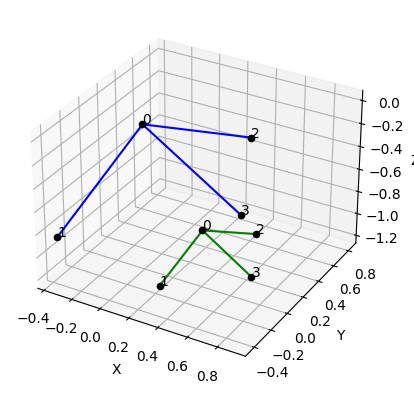

In [7]:
receptor = torch.tensor([[0.0,0.0,0.0],[1.0,0.0,0.0],[0,1.0,0],[0,0,1.0]])
offset = torch.tensor([[0.5,0.5,0.5]])
ligand = 0.5 * receptor + offset
random_rotation = torch.from_numpy(R.random().as_matrix()).float()     

receptor = receptor @ random_rotation
ligand = ligand @ random_rotation

graph_frame(receptor, ligand)

<IPython.core.display.Javascript object>

In [22]:
print('moo')

moo


MovieWriter Pillow unavailable; using Pillow instead.


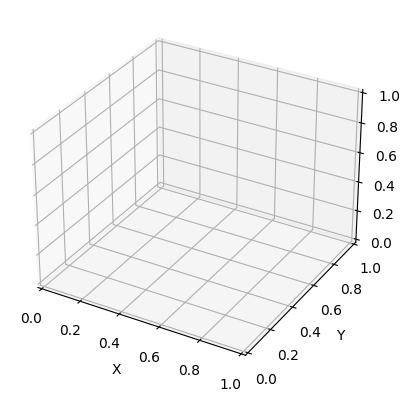

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.random.random(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk


def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(walk[:num, :2].T)
        line.set_3d_properties(walk[:num, 2])
    return lines


# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 30
walks = [random_walk(num_steps) for index in range(40)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
lines = [ax.plot([], [], [])[0] for _ in walks]

# Setting the axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walks, lines), interval=100)
ani.save('boo.gif', writer='Pillow', fps=60)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter 